+ Name: Vanshita
+ Roll Number: 202110102

In [54]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, levene
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pingouin as pg
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kruskal
# from scikit_posthocs import posthoc_dunn

## Memory Scores

In [3]:
data1 = {
    'Normal children': [24, 22, 19, 22, 28, 26, 28, 24, 30, 29, 25, 20, 17, 19, 18, 26, 27, 24, 27, 27],
    'Autistic children': [15, 2, 1, 21, 3, 10, 9, 8, 3, 7, 6, 18, 2, 5, 2, 5, 0, 27, None, None],
    'Children with epilepsy': [30, 15, 34, 26, 14, 28, 17, 29, 25, 11, 37, 36, 34, 22, 18, 5, 12, 10, 15, None]
}

df1 = pd.DataFrame(data1)
df1

,Normal children,Autistic children,Children with epilepsy
0,24,15.0,30.0
1,22,2.0,15.0
2,19,1.0,34.0
3,22,21.0,26.0
4,28,3.0,14.0
5,26,10.0,28.0
6,28,9.0,17.0
7,24,8.0,29.0
8,30,3.0,25.0
9,29,7.0,11.0


In [4]:
data = {
    'Normal children': [24, 22, 19, 22, 28, 26, 28, 24, 30, 29, 25, 20, 17, 19, 18, 26, 27, 24, 27, 27],
    'Autistic children': [15, 2, 1, 21, 3, 10, 9, 8, 3, 7, 6, 18, 2, 5, 2, 5, 0, 27],
    'Children with epilepsy': [30, 15, 34, 26, 14, 28, 17, 29, 25, 11, 37, 36, 34, 22, 18, 5, 12, 10, 15]
}

In [5]:
normal_scores = data['Normal children']
autistic_scores = data['Autistic children']
epilepsy_scores = data['Children with epilepsy']

cols = [normal_scores, autistic_scores, epilepsy_scores] 

#### Normality checking

In [6]:
cols = [normal_scores, autistic_scores, epilepsy_scores]

for label, scores in data.items():
    if None not in scores:  # Exclude None values
        stat, p = shapiro(scores)
        print(f'Shapiro-Wilk test for {label}:')
        print(f'Statistic: {stat}, p-value: {p}')
        if p > 0.05:
            print('The data appears to be normally distributed.')
        else:
            print('The data does not appear to be normally distributed.')
        print()
    else:
        print(f'Shapiro-Wilk test for {label}:')
        print('Data contains missing values, test cannot be performed.')
        print()

Shapiro-Wilk test for Normal children:
Statistic: 0.942033588886261, p-value: 0.2618934214115143
The data appears to be normally distributed.

Shapiro-Wilk test for Autistic children:
Statistic: 0.8562055230140686, p-value: 0.01062549278140068
The data does not appear to be normally distributed.

Shapiro-Wilk test for Children with epilepsy:
Statistic: 0.9467161893844604, p-value: 0.34695833921432495
The data appears to be normally distributed.



#### **Since the memory scores for autistic children is not a normal distribution, we perform the Kruskal wallis test instead of normal ANOVA**

In [55]:
statistic, p_value = kruskal(normal_scores, autistic_scores, epilepsy_scores)

# Print Kruskal-Wallis test results
print("Kruskal-Wallis Test:")
print(f"Statistic: {statistic}, p-value: {p_value}")

Kruskal-Wallis Test:
Statistic: 24.96372784522497, p-value: 3.7948566447011024e-06


Since the p-value (0.00134) is less than the typical significance level of 0.05, we reject the null hypothesis of equal variances. This means that there is significant evidence to suggest that the variances of the three groups ("Normal children", "Autistic children", and "Children with epilepsy") are not equal.


Based on the Kruskal results:

+ F-statistic: 24.9637
+ p-value: 3.423229-08

1. Since the p-value is much smaller than the typical significance level of 0.05, we reject the null hypothesis. 

2. This means that there is strong evidence to suggest that there is a statistically significant difference between the mean memory scores of at least two of the three groups (Normal children, Autistic children, and Children with epilepsy).

#### Post Hoc

In [10]:
posthoc_results = pg.pairwise_gameshowell(dv='Memory Scores', between='Group', data=df_melted)
posthoc_results

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Autistic children,Children with epilepsy,8.0,22.0,-14.0,2.878159,-4.864221,33.655600,7.660203e-05,-1.554395
1,Autistic children,Normal children,8.0,24.1,-16.1,1.988328,-8.097257,24.767154,5.948007e-08,-2.658193
2,Children with epilepsy,Normal children,22.0,24.1,-2.1,2.417662,-0.868608,23.269404,6.649530e-01,-0.277877


### **Observations**: 

Based on the Games-Howell test results:

1. There is a statistically significant difference in memory scores between Autistic children and Children with epilepsy, with Autistic children having lower scores. The effect size is large (Hedges' g = -1.588745).4

2. There is also a statistically significant difference between Autistic children and Normal children, with Autistic children again having lower scores. The effect size is large (Hedges' g = -2.547258).

3. There is no statistically significant difference in memory scores between Children with epilepsy and Normal children.

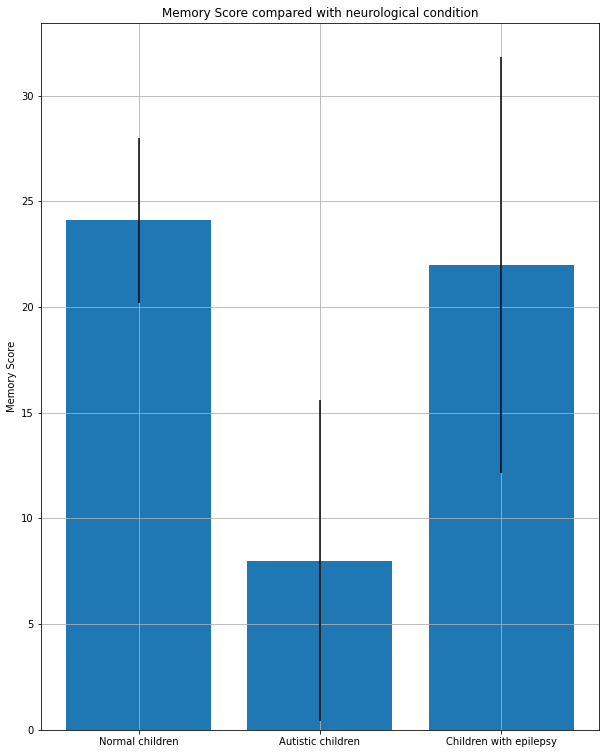

In [47]:
plt.figure(figsize=(10, 13))  

plt.bar(df1.columns, df1.mean(), yerr = df1.std())
plt.ylabel("Memory Score")
plt.grid(True)
plt.title("Memory Score compared with neurological condition")
plt.show()

## Driving

In [29]:
data2 = {
    '1 night of sleep deprivation': [15, 18, 20, 15, 12, 18, 16, 17, 14, 19, 20, 15, 16, 18, 19, 15, 17, 18, 17, 16],
    '2 nights of sleep deprivation': [10, 16, 13, 11, 9, 14, 13, 14, 15, 14, 12, 13, 14, 12, 11, 15, 14, 16, 12, 13],
    '3 nights of sleep deprivation': [5, 3, 9, 6, 4, 7, 8, 2, 4, 6, 9, 5, 3, 7, 1, 8, 7, 3, 6, 4]
}

df2 = pd.DataFrame(data2)
df2

,1 night of sleep deprivation,2 nights of sleep deprivation,3 nights of sleep deprivation
0,15,10,5
1,18,16,3
2,20,13,9
3,15,11,6
4,12,9,4
5,18,14,7
6,16,13,8
7,17,14,2
8,14,15,4
9,19,14,6


#### Normality checking

In [12]:
for condition, scores in data2.items():
    stat, p = shapiro(scores)
    print(f'Shapiro-Wilk test for {condition}:')
    print(f'Statistic: {stat}, p-value: {p}')
    if p > 0.05:
        print('The data appears to be normally distributed.')
    else:
        print('The data does not appear to be normally distributed.')
    print()

Shapiro-Wilk test for 1 night of sleep deprivation:
Statistic: 0.9619258046150208, p-value: 0.5830006003379822
The data appears to be normally distributed.

Shapiro-Wilk test for 2 nights of sleep deprivation:
Statistic: 0.9609363675117493, p-value: 0.5627211928367615
The data appears to be normally distributed.

Shapiro-Wilk test for 3 nights of sleep deprivation:
Statistic: 0.9630073308944702, p-value: 0.6055172681808472
The data appears to be normally distributed.



## Condition 1 - same people in all 3 groups

#### Sphericity of variance - repeated measures anova

In [27]:
import pingouin as pg

df2_new = df2
df2_new['Subject'] = range(1, len(df2_new) + 1)

# Melt the DataFrame to long format
df2_long = df2_new.melt(id_vars='Subject', var_name='Condition', value_name='Score')

# Perform repeated measures ANOVA
rm_anova_result = pg.rm_anova(data=df2_long, dv='Score', within='Condition', subject='Subject')
rm_anova_result

,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,Condition,2,38,178.017544,5.020250e-20,0.843378,0.923463


+ F-value: The F-value is 178.017544.
+ p-value: The p-value is 5.020250e-20, which is extremely small.
+ Effect size (Partial eta-squared): The partial eta-squared (η²) is 0.843378, indicating a large effect size. This means that a significant proportion of the variance in driving ability scores can be explained by the different levels of sleep deprivation.

1. In summary, the repeated measures ANOVA suggests that there are significant differences in driving ability scores across the different levels of sleep deprivation. The effect size is large, indicating that sleep deprivation has a substantial impact on driving ability. 

2. Additionally, the assumption of sphericity is not strongly violated, as indicated by the epsilon value.

#### **Since F-statistic is significant, we perform the Post-hoc test**

#### Post Hoc

In [14]:
posthoc_bonferroni = pg.pairwise_ttests(data=df2_long, dv='Score', within='Condition', subject='Subject', parametric=True, padjust='bonferroni')
posthoc_bonferroni

/home/hp/.local/lib/python3.8/site-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Condition,1 night of sleep deprivation,2 nights of sleep deprivation,True,True,6.933937,19.0,two-sided,1.308794e-06,3.926383e-06,bonferroni,1.401e+04,1.833255
1,Condition,1 night of sleep deprivation,3 nights of sleep deprivation,True,True,18.467681,19.0,two-sided,1.349369e-13,4.048107e-13,bonferroni,4.551e+10,5.073630
2,Condition,2 nights of sleep deprivation,3 nights of sleep deprivation,True,True,11.181630,19.0,two-sided,8.459928e-10,2.537979e-09,bonferroni,1.248e+07,3.573407


### **Inference**

1. The difference in driving ability for individuals when they had 1 night of sleep deprivation compared to when the same individuals experienced 2 nights of deprivation is 3.7 units (p < 0.001).

2. The difference in driving ability for individuals when they had 1 night of sleep deprivation compared to when the same individuals experienced 3 nights of deprivation is 11.4 units (p < 0.001).

3. The difference in driving ability for individuals when they had 2 nights of sleep deprivation compared to when the same individuals experienced 3 nights of deprivation is 7.7 units (p < 0.001).

The most significant difference is observed when individuals experienced 1 night of sleep deprivation compared to when the same individuals experienced 3 nights of deprivation, with a difference of 11.4 units, and the p-value indicating extremely high significance (p < 0.001).

## Condition 2 - different people in all 3 groups

#### Homogeneity of variance - levene

In [15]:
group1 = data2['1 night of sleep deprivation']
group2 = data2['2 nights of sleep deprivation']
group3 = data2['3 nights of sleep deprivation']

In [16]:
# Perform Levene's test
statistic, p_value = levene(group1, group2, group3)

print(f'Levene\'s test statistic: {statistic}')
print(f'p-value: {p_value}')

if p_value < 0.05:
    print('The variances are significantly different across groups, indicating heterogeneity of variances.')
else:
    print('There is no significant difference in variances across groups, indicating homogeneity of variances.')

Levene's test statistic: 0.8974518334369174
p-value: 0.41328764023599707
There is no significant difference in variances across groups, indicating homogeneity of variances.


Since p-values > 0.05, Levene's test indicates that there is no significant difference in variances across groups. Hence the assumption of homogeneity of variances is met.

### One-way Anova

In [17]:
f_statistic, p_value = f_oneway(group1, group2, group3)

print(f'One-way ANOVA F-statistic: {f_statistic}')
print(f'p-value: {p_value}')

if p_value < 0.05:
    print('The one-way ANOVA result is statistically significant, indicating at least one group mean is significantly different from the others.')
else:
    print('The one-way ANOVA result is not statistically significant, indicating no significant differences between group means.')

One-way ANOVA F-statistic: 153.46706467661707
p-value: 1.1305349928649485e-23
The one-way ANOVA result is statistically significant, indicating at least one group mean is significantly different from the others.


#### **Since the F-statistic is significant, we perform the Post-hoc test**

### Post Hoc - Tukey HSD

In [39]:
posthoc_results = pg.pairwise_tukey(dv='Score', between='Condition', data=df2_long)
posthoc_results

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,1 night of sleep deprivation,2 nights of sleep deprivation,16.75,13.05,3.7,0.66392,5.572962,0.000002,1.833255
1,1 night of sleep deprivation,3 nights of sleep deprivation,16.75,5.35,11.4,0.66392,17.170749,0.000000,5.073630
2,2 nights of sleep deprivation,3 nights of sleep deprivation,13.05,5.35,7.7,0.66392,11.597787,0.000000,3.573407


### **Inference**

1. Comparing individuals who experienced 1 night of sleep deprivation to those who experienced 2 nights, there is a mean difference in driving ability of 3.7 units. This difference is statistically significant (p < 0.05).

2. When comparing individuals who experienced 1 night of sleep deprivation to those who experienced 3 nights, the mean difference in driving ability is 11.4 units. This difference is highly statistically significant (p < 0.001).

3. Finally, comparing individuals who experienced 2 nights of sleep deprivation to those who experienced 3 nights, there is a mean difference in driving ability of 7.7 units, which is highly statistically significant (p < 0.001).

In conclusion, the data reaffirm that as the duration of sleep deprivation increases, there is a significant decrease in driving ability. This highlights the critical importance of adequate sleep for maintaining safe driving practices.

### Plot analysed data

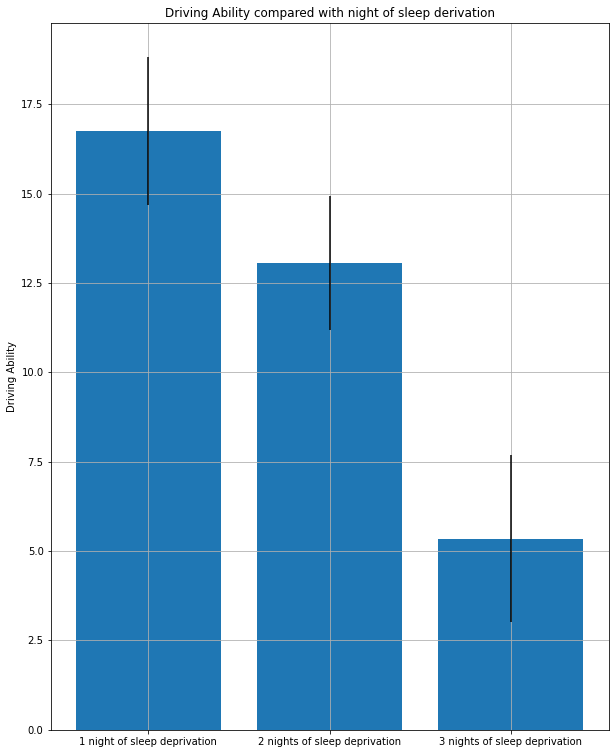

In [44]:
plt.figure(figsize=(10, 13))  

plt.bar(df2.columns, df2.mean(), yerr = df2.std())
plt.ylabel("Driving Ability")
plt.grid(True)
plt.title("Driving Ability compared with night of sleep derivation")
# Display the plot
plt.show()